# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for the **S&P 500** (**ES=F**), **NASDAQ-100** (**NQ=F**), **10-year Treasuries** (**ZN=F**), **gold** (**GC=F**), and **US dollar** (**DX=F**), as well as data for a diversified set of assets, including the **SPDR S&P 500 ETF** (**SPY**), **Vanguard Real Estate ETF** (**VNQ**), leading technology stocks like **Apple** (**AAPL**), **NVIDIA** (**NVDA**), and **Microsoft** (**MSFT**), **Toyota Motor Corporation** (**TM**), and **Bitcoin** (**BTC-USD**), using the `yfinance` library.

In [2]:
# Download front-month futures data
symbols = [
    'ES=F',
    'NQ=F',
    'ZN=F',
    'GC=F',
    'DX=F',
    'SPY',
    'VNQ',
    'AAPL',
    'NVDA',
    'MSFT',
    'TM',
    'BTC-USD'
]
data = yf.download(symbols)
data

[*********************100%%**********************]  12 of 12 completed


Price        Adj Close                                                  \
Ticker            AAPL       BTC-USD        DX=F     ES=F         GC=F   
Date                                                                     
1980-03-17         NaN           NaN         NaN      NaN          NaN   
1980-03-18         NaN           NaN         NaN      NaN          NaN   
1980-03-19         NaN           NaN         NaN      NaN          NaN   
1980-03-20         NaN           NaN         NaN      NaN          NaN   
1980-03-21         NaN           NaN         NaN      NaN          NaN   
...                ...           ...         ...      ...          ...   
2024-11-26  235.059998  91985.320312  106.968002  6038.25  2620.300049   
2024-11-27  234.929993  95962.531250  106.047997  6015.00  2639.899902   
2024-11-28         NaN  95652.468750  106.047997  6029.75  2639.699951   
2024-11-29  237.330002  97461.523438  105.828003  6051.50  2657.000000   
2024-11-30         NaN  96920.125000         NaN      NaN          NaN   

Price                                                                ...  \
Ticker            MSFT     NQ=F        NVDA         SPY          TM  ...   
Date                                                                 ...   
1980-03-17         NaN      NaN         NaN         NaN    2.296798  ...   
1980-03-18         NaN      NaN         NaN         NaN    2.306134  ...   
1980-03-19         NaN      NaN         NaN         NaN    2.306134  ...   
1980-03-20         NaN      NaN         NaN         NaN    2.306134  ...   
1980-03-21         NaN      NaN         NaN         NaN    2.362153  ...   
...                ...      ...         ...         ...         ...  ...   
2024-11-26  427.989990  20993.5  136.919998  600.650024  172.520004  ...   
2024-11-27  422.989990  20813.0  135.339996  598.830017  169.720001  ...   
2024-11-28         NaN  20890.0         NaN         NaN         NaN  ...   
2024-11-29  423.459991  20993.5  138.250000  602.549988  170.630005  ...   
2024-11-30         NaN      NaN         NaN         NaN         NaN  ...   

Price        Volume                                                          \
Ticker         DX=F       ES=F      GC=F        MSFT      NQ=F         NVDA   
Date                                                                          
1980-03-17      NaN        NaN       NaN         NaN       NaN          NaN   
1980-03-18      NaN        NaN       NaN         NaN       NaN          NaN   
1980-03-19      NaN        NaN       NaN         NaN       NaN          NaN   
1980-03-20      NaN        NaN       NaN         NaN       NaN          NaN   
1980-03-21      NaN        NaN       NaN         NaN       NaN          NaN   
...             ...        ...       ...         ...       ...          ...   
2024-11-26      0.0  1336843.0  177858.0  23458900.0  505254.0  190287700.0   
2024-11-27  24314.0  1157171.0   61653.0  18332400.0  520026.0  226370900.0   
2024-11-28   6934.0  1157171.0   61653.0         NaN  520026.0          NaN   
2024-11-29   6934.0  1157171.0   61653.0  16271900.0  520026.0  141863200.0   
2024-11-30      NaN        NaN       NaN         NaN       NaN          NaN   

Price                                                   
Ticker             SPY        TM        VNQ       ZN=F  
Date                                                    
1980-03-17         NaN   41109.0        NaN        NaN  
1980-03-18         NaN    9343.0        NaN        NaN  
1980-03-19         NaN       0.0        NaN        NaN  
1980-03-20         NaN   10277.0        NaN        NaN  
1980-03-21         NaN    8409.0        NaN        NaN  
...                ...       ...        ...        ...  
2024-11-26  45621300.0  410700.0  2774500.0  2106572.0  
2024-11-27  34000200.0  478500.0  2383100.0   571957.0  
2024-11-28         NaN       NaN        NaN   571957.0  
2024-11-29  30177400.0  247700.0  1922400.0   571957.0  
2024-11-30         NaN       NaN        NaN       

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [3]:
# Resample data to monthly frequency
data = data.resample("M").last()
# Convert index to datetime
data.index = pd.to_datetime(data.index)

In [4]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [5]:
data

Price        Adj Close                                                  \
Ticker            AAPL       BTC-USD        DX=F     ES=F         GC=F   
Date                                                                     
1980-03-31         NaN           NaN         NaN      NaN          NaN   
1980-04-30         NaN           NaN         NaN      NaN          NaN   
1980-05-31         NaN           NaN         NaN      NaN          NaN   
1980-06-30         NaN           NaN         NaN      NaN          NaN   
1980-07-31         NaN           NaN         NaN      NaN          NaN   
...                ...           ...         ...      ...          ...   
2024-07-31  221.579468  64619.250000  103.859001  5558.00  2426.500000   
2024-08-31  228.748337  58969.898438  101.624001  5661.00  2493.800049   
2024-09-30  232.743942  63329.500000  100.521004  5814.25  2636.100098   
2024-10-31  225.661728  70215.187500  103.877998  5738.50  2738.300049   
2024-11-30  237.330002  96920.125000  105.828003  6051.50  2657.000000   

Price                                                                 ...  \
Ticker            MSFT      NQ=F        NVDA         SPY          TM  ...   
Date                                                                  ...   
1980-03-31         NaN       NaN         NaN         NaN    2.315470  ...   
1980-04-30         NaN       NaN         NaN         NaN    2.548885  ...   
1980-05-31         NaN       NaN         NaN         NaN    2.754290  ...   
1980-06-30         NaN       NaN         NaN         NaN    2.617509  ...   
1980-07-31         NaN       NaN         NaN         NaN    2.568492  ...   
...                ...       ...         ...         ...         ...  ...   
2024-07-31  416.763092  19505.25  117.009987  549.125671  193.550003  ...   
2024-08-31  416.306702  19623.00  119.359795  561.956299  189.800003  ...   
2024-09-30  429.440399  20261.25  121.440002  573.760010  178.570007  ...   
2024-10-31  405.538269  20021.75  132.759995  568.640015  173.020004  ...   
2024-11-30  423.459991  20993.50  138.250000  602.549988  170.630005  ...   

Price        Volume                                                         \
Ticker         DX=F       ES=F     GC=F        MSFT      NQ=F         NVDA   
Date                                                                         
1980-03-31      NaN        NaN      NaN         NaN       NaN          NaN   
1980-04-30      NaN        NaN      NaN         NaN       NaN          NaN   
1980-05-31      NaN        NaN      NaN         NaN       NaN          NaN   
1980-06-30      NaN        NaN      NaN         NaN       NaN          NaN   
1980-07-31      NaN        NaN      NaN         NaN       NaN          NaN   
...             ...        ...      ...         ...       ...          ...   
2024-07-31  22366.0  2156505.0   1313.0  42891400.0  762246.0  473174200.0   
2024-08-31  14853.0  1558874.0    208.0  24308300.0  495609.0  333751600.0   
2024-09-30  21482.0  1502729.0    973.0  16807300.0  510434.0  226553700.0   
2024-10-31  27933.0  1973513.0    849.0  53971000.0  686677.0  270039600.0   
2024-11-30   6934.0  1157171.0  61653.0  16271900.0  520026.0  141863200.0   

Price                                                   
Ticker             SPY        TM        VNQ       ZN=F  
Date                                                    
1980-03-31         NaN    1869.0        NaN        NaN  
1980-04-30         NaN    3737.0        NaN        NaN  
1980-05-31         NaN    6540.0        NaN        NaN  
1980-06-30         NaN    8008.0        NaN        NaN  
1980-07-31         NaN       0.0        NaN        NaN  
...                ...       ...        ...        ...  
2024-07-31  65663400.0  372300.0  5633800.0  3268894.0  
2024-08-31  62700100.0  240700.0  3490000.0    33598.0  
2024-09-30  63557400.0  458600.0  4207000.0  2461714.0  
2024-10-31  60182500.0  234800.0  4946300.0  3372923.0  
2024-11-30  30177400.0  247700.0  1922400.0   5719

### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [6]:
# Subset adjusted close prices and fill NaNs
prices = data["Adj Close"].ffill().dropna()
# Convert index to datetime
prices.index = pd.to_datetime(prices.index)

In [7]:
prices

Ticker,AAPL,BTC-USD,DX=F,ES=F,GC=F,MSFT,NQ=F,NVDA,SPY,TM,VNQ,ZN=F
Date,,,,,,,,,,,,
2014-09-30,22.339586,386.944000,86.046997,1965.50,1210.500000,39.559498,4044.75,0.440986,165.172653,110.487206,48.050571,124.640625
2014-10-31,23.947149,338.321014,87.015999,2011.50,1171.099976,40.062962,4150.50,0.467039,169.062668,114.078293,52.825527,126.359375
2014-11-30,26.485037,378.046997,88.413002,2066.25,1175.199951,41.054127,4338.25,0.503339,173.707123,115.751633,53.882168,127.656250
2014-12-31,24.581003,320.192993,90.647003,2052.50,1183.900024,39.886284,4232.75,0.481257,173.266479,117.960815,54.908073,126.796875
2015-01-31,26.090872,217.464005,94.998001,1988.50,1278.500000,34.691185,4141.25,0.460854,168.132751,121.128876,58.670292,130.875000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,221.579468,64619.250000,103.859001,5558.00,2426.500000,416.763092,19505.25,117.009987,549.125671,193.550003,89.654961,111.812500
2024-08-31,228.748337,58969.898438,101.624001,5661.00,2493.800049,416.306702,19623.00,119.359795,561.956299,189.800003,94.335533,113.046875
2024-09-30,232.743942,63329.500000,100.521004,5814.25,2636.100098,429.440399,20261.25,121.440002,573.760010,178.570007,97.419998,114.281250


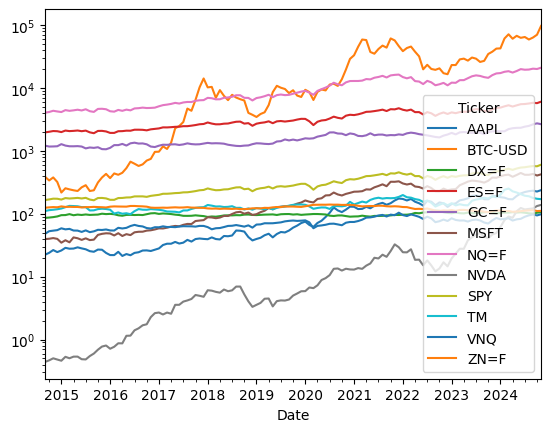

In [8]:
prices.plot()
plt.yscale("log")
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [9]:
# Compute arithmetic returns and drop missing values
returns = prices.pct_change().dropna()

In [10]:
returns

Ticker,AAPL,BTC-USD,DX=F,ES=F,GC=F,MSFT,NQ=F,NVDA,SPY,TM,VNQ,ZN=F
Date,,,,,,,,,,,,
2014-10-31,0.071960,-0.125659,0.011261,0.023404,-0.032549,0.012727,0.026145,0.059079,0.023551,0.032502,0.099374,0.013790
2014-11-30,0.105979,0.117421,0.016055,0.027218,0.003501,0.024740,0.045236,0.077725,0.027472,0.014668,0.020002,0.010263
2014-12-31,-0.071891,-0.153034,0.025268,-0.006655,0.007403,-0.028446,-0.024319,-0.043872,-0.002537,0.019086,0.019040,-0.006732
2015-01-31,0.061424,-0.320835,0.047999,-0.031181,0.079905,-0.130248,-0.021617,-0.042394,-0.029629,0.026857,0.068518,0.032163
2015-02-28,0.100777,0.169219,0.003400,0.057455,-0.051545,0.093121,0.072744,0.153383,0.056205,0.050601,-0.036742,-0.018744
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,0.054411,0.030967,-0.015974,0.006611,0.042445,-0.063989,-0.021177,-0.052776,0.012109,-0.055715,0.079394,0.016622
2024-08-31,0.032353,-0.087425,-0.021520,0.018532,0.027735,-0.001095,0.006037,0.020082,0.023366,-0.019375,0.052207,0.011040
2024-09-30,0.017467,0.073929,-0.010854,0.027071,0.057062,0.031548,0.032526,0.017428,0.021005,-0.059168,0.032697,0.010919


### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [11]:
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window_size).std()
    rolling_inverse_vol = 1 / rolling_vol
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.apply(
        lambda x: x / x.sum(), axis=1
    )
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1)
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 36)

In [12]:
# Verify each date sum 1
risk_parity_weights.dropna().sum(axis=1)

Date
2017-10-31    1.0
2017-11-30    1.0
2017-12-31    1.0
2018-01-31    1.0
2018-02-28    1.0
             ... 
2024-07-31    1.0
2024-08-31    1.0
2024-09-30    1.0
2024-10-31    1.0
2024-11-30    1.0
Freq: M, Length: 86, dtype: float64

In [13]:
# Verify that the sum of all weights across rows equals
# the total number of rows (weights sum to 1 per row)
print(risk_parity_weights.dropna().sum(axis=1).sum())
print(risk_parity_weights.dropna().shape[0])

86.0
86


Now let's see how the portfolio composition changes over time.

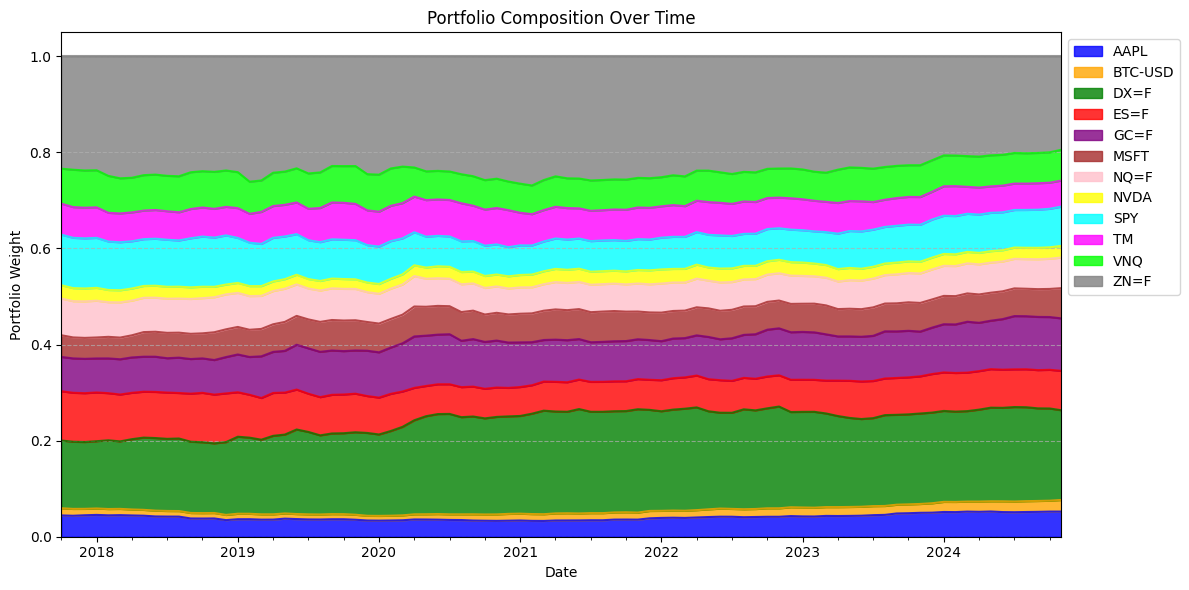

In [14]:
# Assign specific colors to each asset
custom_colors = {
    'AAPL': 'blue',
    'BTC-USD': 'orange',
    'DX=F': 'green',
    'ES=F': 'red',
    'GC=F': 'purple',
    'MSFT': 'brown',
    'NQ=F': 'pink',
    'NVDA': 'yellow',
    'SPY': 'cyan',
    'TM': 'magenta',
    'VNQ': 'lime',
    'ZN=F': 'gray'
}

# Plot a stacked area chart to visualize portfolio composition over time
risk_parity_weights.dropna().plot.area(
    figsize=(12, 6),
    alpha=0.8,
    color=[custom_colors[asset] for asset in risk_parity_weights.columns]
)
plt.title('Portfolio Composition Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Weight')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The chart how assets like **10-year Treasuries (ZN=F)  and US dollar (DX=F) hold significant weight**, contributing the most to the portfolio's performance, while others, such as **Bitcoin (BTC-USD) and Nvidia (NVDA), maintain smaller proportions**. This make sense as stocks tend to be more volatile, aligning with the risk-parity approach.

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [15]:
# Calculate weighted returns
weighted_returns = returns * risk_parity_weights
risk_parity_portfolio_returns = weighted_returns.dropna().sum(axis=1)

In [16]:
weighted_returns

Ticker,AAPL,BTC-USD,DX=F,ES=F,GC=F,MSFT,NQ=F,NVDA,SPY,TM,VNQ,ZN=F
Date,,,,,,,,,,,,
2014-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,0.002778,0.000688,-0.003142,0.000519,0.004709,-0.003687,-0.001303,-0.001239,0.000947,-0.003060,0.005062,0.003342
2024-08-31,0.001665,-0.001974,-0.004208,0.001464,0.003065,-0.000063,0.000373,0.000473,0.001841,-0.001061,0.003298,0.002227
2024-09-30,0.000905,0.001677,-0.002092,0.002155,0.006319,0.001823,0.002027,0.000414,0.001666,-0.003264,0.002061,0.002195


In [17]:
risk_parity_portfolio_returns

Date
2017-10-31    0.032060
2017-11-30    0.017100
2017-12-31    0.006888
2018-01-31    0.020796
2018-02-28   -0.013958
                ...   
2024-07-31    0.005613
2024-08-31    0.007099
2024-09-30    0.015885
2024-10-31   -0.002481
2024-11-30    0.031336
Freq: M, Length: 86, dtype: float64

### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [18]:
# Evaluate portfolio performance
annual_mean_return = risk_parity_portfolio_returns.mean() * 12
annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(12)
skewness = risk_parity_portfolio_returns.skew()
kurtosis = risk_parity_portfolio_returns.kurtosis() + 3

# Compute drawdown
cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdowns = (running_max - cumulative_returns) / running_max
max_drawdown = drawdowns.max()

# Compute Sharpe ratio
sharpe_ratio = annual_mean_return / annual_volatility

# Compute Sortino ratio
downside_std = risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0].std() * np.sqrt(12)
sortino_ratio = annual_mean_return / downside_std

# Compute Calmar ratio
calmar_ratio = annual_mean_return / max_drawdown

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.1087
Annual Volatility: 0.0903
Skewness: -0.4459
Kurtosis: 2.8071
Maximum Drawdown: 0.1608
Sharpe Ratio: 1.2035
Sortino Ratio: 2.0397
Calmar Ratio: 0.6763


The analysis of the portfolio's performance highlights several key metrics:

- **Mean Annual Return:** The portfolio achieved an average annual return of **10.87%**, indicating consistent growth over time.
- **Annual Volatility:** The annual volatility was measured at **9.03%**, reflecting relatively stable returns with low risk.
- **Skewness:** The return distribution exhibited a skewness of **-0.4458**, suggesting a tendency toward larger negative returns compared to positive ones, indicating more outliers on the left side of the distribution.
- **Kurtosis:** A kurtosis value of **2.8070** indicates that the portfolio’s returns are close to a normal distribution, with slightly fewer extreme returns than a perfect normal distribution (distribution with thin tails).
- **Maximum Drawdown:** The portfolio experienced a maximum drawdown of **16.08%**, representing the largest peak-to-trough decline during the observed period.
- **Sharpe Ratio:** With a Sharpe Ratio of **1.2035**, the portfolio provides strong risk-adjusted returns, compensating well for the level of risk.
- **Sortino Ratio:** The Sortino Ratio of **2.0398** demonstrates excellent risk-adjusted returns when considering only downside risk, making the portfolio favorable for risk-averse investors.
- **Calmar Ratio:** A Calmar Ratio of **0.6763** indicates that while the portfolio is efficient in balancing returns and risk, reducing drawdowns further could enhance its overall efficiency.

### Summary
This portfolio showcases a solid performance with **strong risk-adjusted returns** and **low volatility**, making it relatively stable. However, the **negative skewness** suggests a need for caution due to the potential for extreme losses. Optimizing drawdown management could further improve the portfolio's efficiency, particularly by targeting a higher Calmar Ratio.


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


In [19]:
def plot_returns(cumulative_returns, drawdowns):
    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(14,7))
    # Plotting the results
    ax.plot(cumulative_returns - 1, label='Cumulative Returns')
    ax.fill_between(drawdowns.index, drawdowns, label='Drawdowns', color='red', alpha=0.3)
    # Setting x-axis major locator to each year and formatter
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Adding grid with vertical lines for each year
    ax.grid(True, which='major', linestyle='--', color='grey')
    # Rotate x-axis labels by 45 degrees
    plt.xticks(rotation=45)
    ax.legend(fontsize=14)
    ax.set_title('Cumulative Returns and Drawdowns')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns/Drawdown')
    fig.tight_layout()
    plt.show()

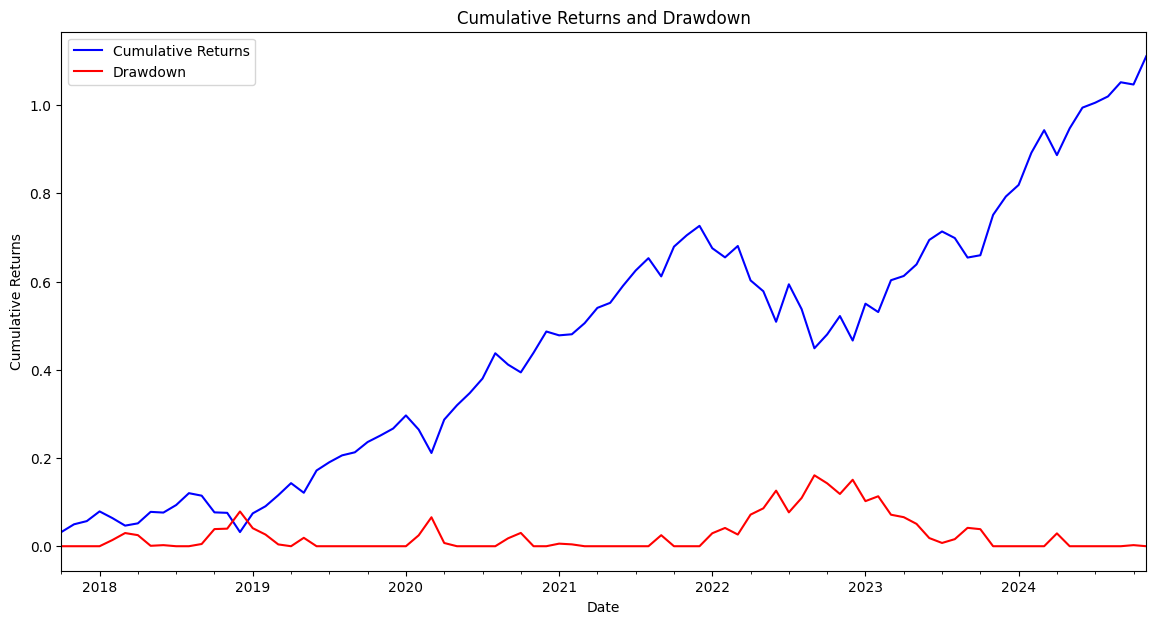

In [20]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdowns.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()

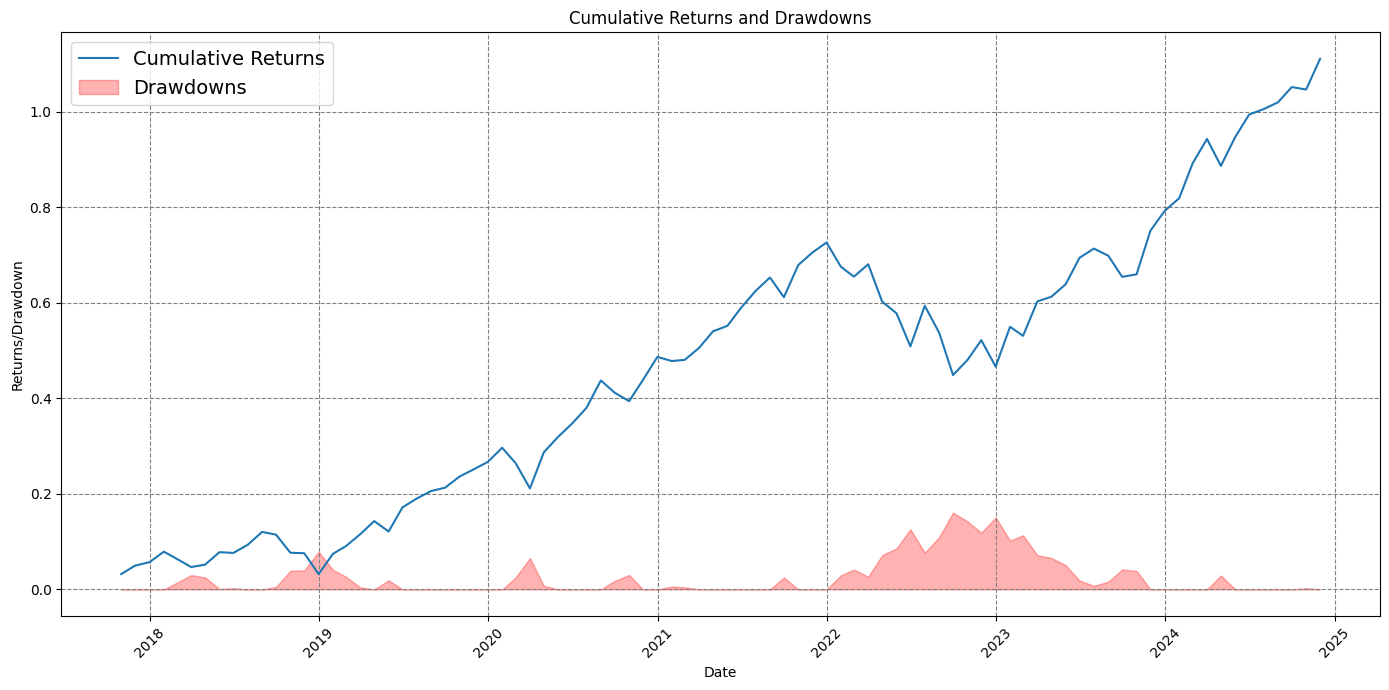

In [21]:
plot_returns(cumulative_returns, drawdowns)